In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()
from sklearn.linear_model import LinearRegression
raw_data=pd.read_csv(r'C:\Users\LasimaSN\Downloads\The Data Science Course 2020 - All Resources\Part_5_Advanced_Statistical_Methods_(Machine_Learning)\S36_L236\2.01. Admittance.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [2]:
data=raw_data.copy()
data['Admitted']=data['Admitted'].map({'Yes':1,'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [5]:
y=data['Admitted']
x1=data['SAT']

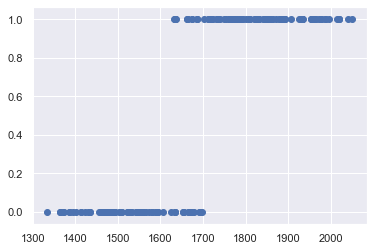

In [6]:
plt.scatter(x1,y)
plt.show()

In [7]:
x=sm.add_constant(x1)
reg_lin=sm.OLS(y,x)
results=reg_lin.fit()

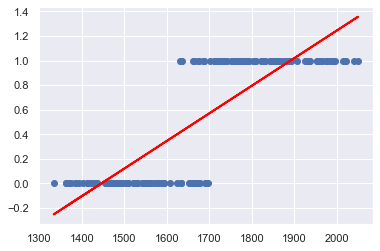

In [8]:
plt.scatter(x1,y)
y_hat=x1*results.params[1]+results.params[0]
plt.plot(x1,y_hat,lw=2,color='Red')
plt.show()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


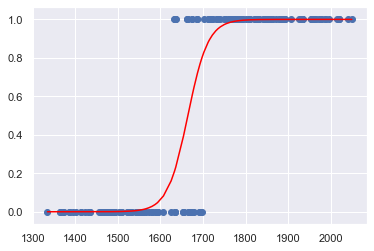

In [15]:
reg_log=sm.Logit(y,x)
results_log=reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) /(1+np.exp(b0+x*b1)))
                    
f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))
                    
plt.scatter(x1,y)
plt.plot(x_sorted,f_sorted,color='Red')
plt.show()